In [63]:
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt
import random
import numpy

In [45]:
#실제 데이터
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2),
        random.uniform(0.8, 1.0),
        random.uniform(0.0, 0.2)])
    return real_data
def generate_random(size):
    random_data = torch.rand(size)
    return random_data
#판별기
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(4, 3),
        nn.Sigmoid(),
        nn.Linear(3, 1),
        nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)
        
        #진행 측정을 위한 변수 초기화
        self.counter = 0
        self.progress = []
        pass
    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if(self.counter %10 == 0):
            self.progress.append(loss.item())
            pass
        if(self.counter %10000 == 0):
            print(f'counter =  {self.counter}')
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5))
        pass


In [46]:
D = Discriminator()
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000


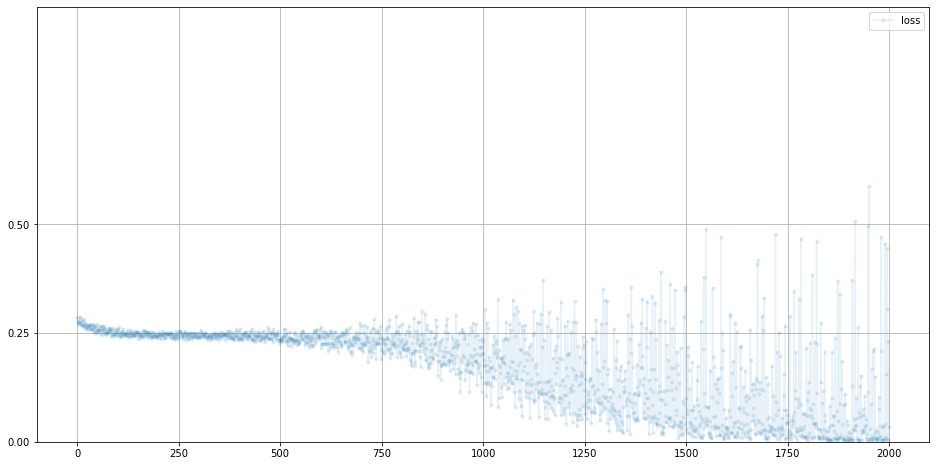

In [47]:
D.plot_progress()

In [48]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.7947880625724792
0.5823403596878052


In [55]:
#생성기
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )
        self.optimiser = torch.optim.SGD(self.parameters(), lr = 0.01)
        self.counter = 0
        self.progress = []
        pass
    def forward(self, inputs):
        return self.model(inputs)
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        
        self.counter += 1
        if self.counter %10 == 0:
            self.progress.append(loss.item())
            pass
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
        pass
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns = ['loss'])
        df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker = '.', grid = True, yticks = (0, 0.25, 0.5))
        pass    

In [56]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6165, 0.5997, 0.5361, 0.4104], grad_fn=<SigmoidBackward>)

In [58]:
%%time

D = Discriminator()
G = Generator()
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    pass

counter =  10000
counter =  20000
Wall time: 7.09 s


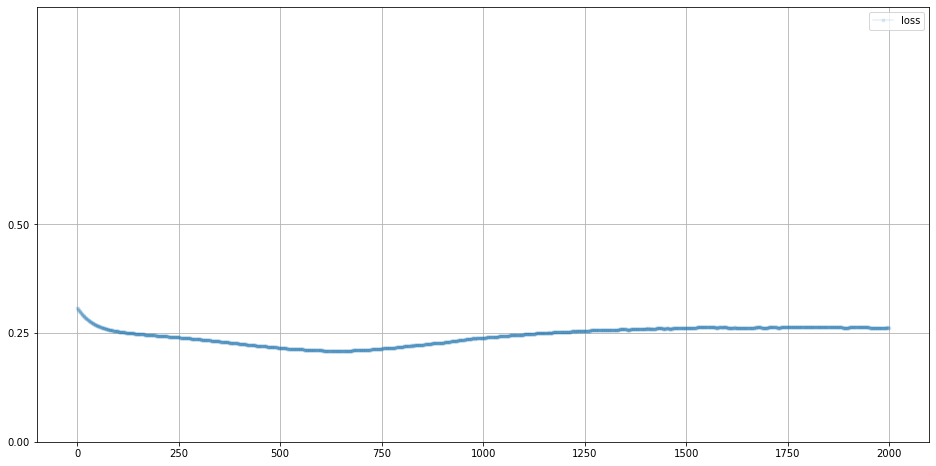

In [59]:
D.plot_progress()

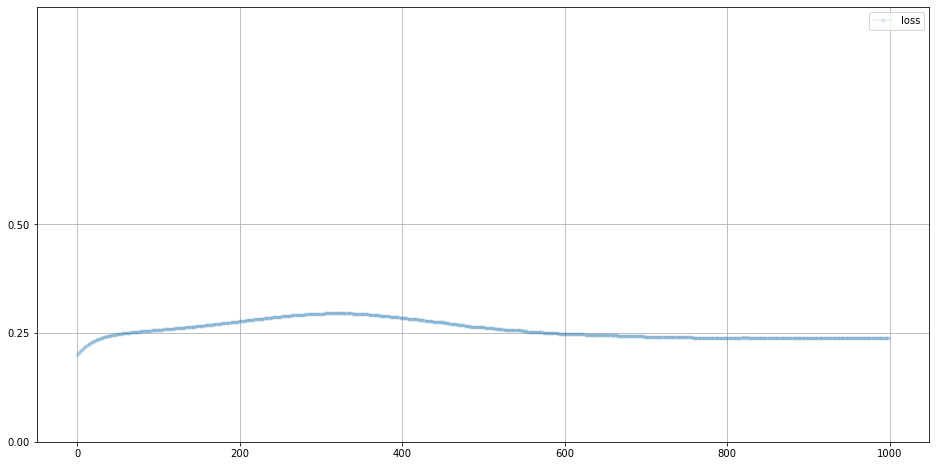

In [60]:
G.plot_progress()

In [61]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9313, 0.0360, 0.9495, 0.0325], grad_fn=<SigmoidBackward>)